# 9. Support Vector Machines

In [1]:
# -> Define SparkSession

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('svm').getOrCreate()

import utils

In [2]:
# Load modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import LinearSVC, LogisticRegression

## 9.6 Lab: Support Vector Machines

### ***9.6.2 (Linear) Support Vector Machine***

In [3]:
# -> Generate data:

n = 200
x = np.random.normal(0, 1, (n,2))
y = np.hstack([np.repeat(-1, n/2), np.repeat(1,n/2)])
x[y==1,] = x[y==1,] + 1
pd_data = pd.DataFrame(np.column_stack((y,x)),columns=['y', 'x1','x2'])
dat = spark.createDataFrame(pd_data)


# -> Prepare data:

data = utils.prepare_data(df = dat,
                    labelCol = 'y',
                    label_is_categorical = True,
                    categoricalCols = [],
                    continuousCols = ['x1', 'x2']
                   )
data.show(5)


# -> Create train and test samples:

train, test = data.randomSplit([0.5, 0.5], seed=11)

# -> Describe the model:

model = LinearSVC(featuresCol="features", 
                 labelCol='label')

# -> Fit the model
model_fit = model.fit(train)

# -> Print the coefficients and intercept for linearsSVC:
print("Coefficients: " + str(model_fit.coefficients))
print("Intercept: " + str(model_fit.intercept))

# -> Make predictions on test sample:

predictions = model_fit.transform(test)
print('\nPredictions:'); predictions.select('label', 'prediction').show(5)


# Evaluate the model on the test sample

metrics = MulticlassMetrics(predictions.select('label','prediction').rdd)

print('\nConfusion Matrix:')
confusion_matrix = pd.DataFrame(metrics.confusionMatrix().toArray())

print(confusion_matrix)
print('\nAccuracy = {:.3f}'.format(metrics.accuracy))

+----+-------------------+--------------------+--------------------+-----+
|   y|                 x1|                  x2|            features|label|
+----+-------------------+--------------------+--------------------+-----+
|-1.0| 0.5534181660181828|  2.3811047161420573|[0.55341816601818...|  0.0|
|-1.0| 0.7351064836773553|  0.5624760875167293|[0.73510648367735...|  0.0|
|-1.0|-0.2677669683162056|-0.13134008162186978|[-0.2677669683162...|  0.0|
|-1.0|0.21998335828156101| -1.1154600867718099|[0.21998335828156...|  0.0|
|-1.0| 0.2024423629922388|  -1.435005876348171|[0.20244236299223...|  0.0|
+----+-------------------+--------------------+--------------------+-----+
only showing top 5 rows

Coefficients: [0.7866843224348463,0.3627448403418112]
Intercept: -0.8717357949795913

Predictions:
+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows


Conf

### *9.6.3 ROC Curves*

+----+-------------------+-------------------+--------------------+-----+
|   y|                 x1|                 x2|            features|label|
+----+-------------------+-------------------+--------------------+-----+
|-1.0| 0.6320551449078792|-1.0702167710700077|[0.63205514490787...|  0.0|
|-1.0|-0.6730375897419049|-0.4923684557797119|[-0.6730375897419...|  0.0|
|-1.0|0.25855858806436366|  2.463727134707672|[0.25855858806436...|  0.0|
|-1.0| 0.9074640180155681| 1.7638132611759063|[0.90746401801556...|  0.0|
|-1.0| -1.122740439905784|-1.1240864741699477|[-1.1227404399057...|  0.0|
+----+-------------------+-------------------+--------------------+-----+
only showing top 5 rows



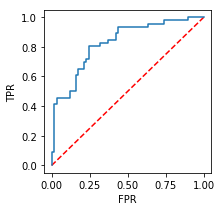

In [4]:
# -> Generate data:

n = 200
x = np.random.normal(0, 1, (n,2))
y = np.hstack([np.repeat(-1, n/2), np.repeat(1,n/2)])
x[y==1,] = x[y==1,] + 1
pd_data = pd.DataFrame(np.column_stack((y,x)),columns=['y', 'x1','x2'])
dat = spark.createDataFrame(pd_data)

# -> Prepare data:

data = utils.prepare_data(df = dat,
                    labelCol = 'y',
                    label_is_categorical = True,
                    categoricalCols = [],
                    continuousCols = ['x1', 'x2']
                   )
data.show(5)

# -> Create train and test samples:

train, test = data.randomSplit([0.5, 0.5], seed=11)


# -> Describe the  model

model = LogisticRegression(featuresCol="features", 
                           labelCol='label')

# Fit the model:

model_fit = model.fit(train)
                      

# Predictions:

predictions = model_fit.transform(test)

# ROC curve:

plt.figure(figsize=(3,3))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(model_fit.summary.roc.select('FPR').collect(),
         model_fit.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()